In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from geopy.distance import great_circle

`BACA KOTA TANGERANG`

In [2]:
data1=pd.read_excel('kota_tang_final_.xlsx')
data1

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,SalesmanNew,Hari,Group
0,42,Sat,Odd,601642287,Retail,-6.20997,106.608,Kota Tangerang,0.081736,0,Mon,Odd
1,41,Sat,Odd,601642304,Retail,-6.20819,106.609,Kota Tangerang,0.152517,0,Mon,Even
2,41,Sat,Odd,602748094,Retail,-6.20819,106.609,Kota Tangerang,0.152517,0,Mon,Odd
3,42,Thurs,Odd,601642240,Retail,-6.20942,106.610,Kota Tangerang,0.159372,0,Mon,Even
4,41,Sat,Odd,602748096,Retail,-6.20812,106.609,Kota Tangerang,0.159914,0,Mon,Odd
...,...,...,...,...,...,...,...,...,...,...,...,...
19334,1,Sat,Odd,601692768,Retail,-6.03473,106.381,Kota Tangerang,31.790049,41,Sat,Even
19335,1,Sat,Odd,601692769,Retail,-6.03472,106.381,Kota Tangerang,31.790729,41,Sat,Odd
19336,1,Sat,Odd,601692767,Retail,-6.03472,106.381,Kota Tangerang,31.790729,41,Sat,Even
19337,1,Sat,Odd,601692828,Retail,-6.03417,106.381,Kota Tangerang,31.828162,41,Sat,Odd


`BACA TANGERANG SELATAN`

In [3]:
data2=pd.read_excel('tangsel_final_.xlsx')

def replace_salesman_new(x):
    return 42 + x 

data2['SalesmanNew'] = data2['SalesmanNew'].apply(replace_salesman_new)

data2

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,SalesmanNew,Hari,Group
0,63,Fri,Odd,601637725,Retail,-6.26191,106.674,Tangerang Selatan,9.289766,42,Mon,Odd
1,64,Tues,Odd,601647632,Retail,-6.26382,106.673,Tangerang Selatan,9.339894,42,Mon,Even
2,60,Fri,Even,601288171,Retail,-6.25305,106.681,Tangerang Selatan,9.358375,42,Mon,Odd
3,64,Tues,Odd,601637669,Retail,-6.26408,106.673,Tangerang Selatan,9.358619,42,Mon,Even
4,63,Sat,Odd,602491348,Retail,-6.26297,106.674,Tangerang Selatan,9.364165,42,Mon,Odd
...,...,...,...,...,...,...,...,...,...,...,...,...
9205,84,Sat,Odd,601580025,Retail,-6.36126,106.766,Tangerang Selatan,24.240623,61,Sat,Even
9206,73,Fri,Odd,602639786,Retail,-6.30692,106.820,Tangerang Selatan,25.759899,61,Sat,Odd
9207,18,Thurs,Even,602055438,Retail,-6.15335,106.844,Tangerang Selatan,26.765696,61,Sat,Even
9208,18,Thurs,Even,602055437,Retail,-6.15335,106.844,Tangerang Selatan,26.765696,61,Sat,Odd


`BACA KABUPATEN TANGERANG`

In [4]:
data3=pd.read_excel('kab_tang_final_.xlsx')
def replace_salesman_new(x):
    return 62 + x 

data3['SalesmanNew'] = data3['SalesmanNew'].apply(replace_salesman_new)
data3

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,SalesmanNew,Hari,Group
0,43,Wed,Odd,601642135,Retail,-6.21070,106.609,Kabupaten Tangerang,0.143068,62,Mon,Odd
1,43,Wed,Odd,601641710,Retail,-6.21084,106.609,Kabupaten Tangerang,0.157797,62,Mon,Even
2,43,Wed,Odd,601642288,Retail,-6.21083,106.608,Kabupaten Tangerang,0.161349,62,Mon,Odd
3,43,Wed,Odd,601642139,Retail,-6.21111,106.608,Kabupaten Tangerang,0.190476,62,Mon,Even
4,43,Wed,Odd,601641586,Retail,-6.21051,106.610,Kabupaten Tangerang,0.195455,62,Mon,Odd
...,...,...,...,...,...,...,...,...,...,...,...,...
10243,80,Thurs,Even,601692055,Retail,-6.33538,106.412,Kabupaten Tangerang,25.844885,83,Sat,Odd
10244,80,Thurs,Even,601292626,Retail,-6.33548,106.412,Kabupaten Tangerang,25.850908,83,Sat,Even
10245,44,Mon,Odd,602057323,Retail,-6.21280,106.374,Kabupaten Tangerang,25.931428,83,Sat,Odd
10246,80,Thurs,Even,601292625,Retail,-6.33567,106.411,Kabupaten Tangerang,25.955279,83,Sat,Even


`GABUNGIN DATA`

In [5]:
# Menggabungkan data
combined_data = pd.concat([data1, data2, data3], ignore_index=True)


In [6]:
combined_data 

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,SalesmanNew,Hari,Group
0,42,Sat,Odd,601642287,Retail,-6.20997,106.608,Kota Tangerang,0.081736,0,Mon,Odd
1,41,Sat,Odd,601642304,Retail,-6.20819,106.609,Kota Tangerang,0.152517,0,Mon,Even
2,41,Sat,Odd,602748094,Retail,-6.20819,106.609,Kota Tangerang,0.152517,0,Mon,Odd
3,42,Thurs,Odd,601642240,Retail,-6.20942,106.610,Kota Tangerang,0.159372,0,Mon,Even
4,41,Sat,Odd,602748096,Retail,-6.20812,106.609,Kota Tangerang,0.159914,0,Mon,Odd
...,...,...,...,...,...,...,...,...,...,...,...,...
38792,80,Thurs,Even,601692055,Retail,-6.33538,106.412,Kabupaten Tangerang,25.844885,83,Sat,Odd
38793,80,Thurs,Even,601292626,Retail,-6.33548,106.412,Kabupaten Tangerang,25.850908,83,Sat,Even
38794,44,Mon,Odd,602057323,Retail,-6.21280,106.374,Kabupaten Tangerang,25.931428,83,Sat,Odd
38795,80,Thurs,Even,601292625,Retail,-6.33567,106.411,Kabupaten Tangerang,25.955279,83,Sat,Even


In [7]:
# Menyimpan data gabungan ke file Excel baru (opsional)
combined_data.to_excel('HASIL_FINAL_OUTLET.xlsx', index=False)

In [8]:
combined_data[combined_data['SalesmanNew']==73]

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,SalesmanNew,Hari,Group
33675,44,Sat,Odd,602720765,Retail,-6.21400,106.692,Kabupaten Tangerang,9.237267,73,Mon,Odd
33676,50,Thurs,Odd,602711289,Retail,-6.22758,106.527,Kabupaten Tangerang,9.237381,73,Mon,Even
33677,70,Mon,Odd,601293725,Retail,-6.29192,106.619,Kabupaten Tangerang,9.238168,73,Mon,Odd
33678,45,Wed,Even,602720774,Retail,-6.21418,106.692,Kabupaten Tangerang,9.238374,73,Mon,Even
33679,45,Tues,Odd,602720785,Retail,-6.21454,106.692,Kabupaten Tangerang,9.240717,73,Mon,Odd
...,...,...,...,...,...,...,...,...,...,...,...,...
34136,48,Sat,Even,601280783,Retail,-6.22238,106.697,Kabupaten Tangerang,9.880788,73,Sat,Odd
34137,71,Thurs,Even,602493990,Retail,-6.29644,106.627,Kabupaten Tangerang,9.880922,73,Sat,Even
34138,71,Mon,Odd,602048851,Retail,-6.29685,106.625,Kabupaten Tangerang,9.882507,73,Sat,Odd
34139,71,Mon,Odd,602048852,Retail,-6.29686,106.625,Kabupaten Tangerang,9.883600,73,Sat,Even


In [10]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [11]:
combined_data.groupby(['SalesmanNew','Hari'])['Group'].value_counts()

SalesmanNew  Hari   Group
0            Fri    Odd      39
                    Even     38
             Mon    Odd      39
                    Even     38
             Sat    Even     38
                    Odd      38
             Thurs  Odd      39
                    Even     38
             Tues   Odd      39
                    Even     38
             Wed    Odd      39
                    Even     38
1            Fri    Odd      39
                    Even     38
             Mon    Odd      39
                    Even     38
             Sat    Even     38
                    Odd      38
             Thurs  Odd      39
                    Even     38
             Tues   Odd      39
                    Even     38
             Wed    Odd      39
                    Even     38
2            Fri    Odd      39
                    Even     38
             Mon    Even     39
                    Odd      38
             Sat    Even     38
                    Odd      38
             T

In [15]:

# group_counts = combined_data.groupby(['SalesmanNew', 'Hari', 'Group']).size().unstack(fill_value=0)

# # Reset the index to use in plotting
# group_counts = group_counts.reset_index()
heatmap_data = combined_data.pivot_table(
    index='Hari',
    columns='SalesmanNew',
    values='Group',
    aggfunc='count',
    fill_value=0
)

heatmap_data

SalesmanNew,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
Hari,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fri,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,75,76,76,76,76,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
Mon,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
Sat,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
Thurs,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,78,77,76,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77
Tues,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,78,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
Wed,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,77,78,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78


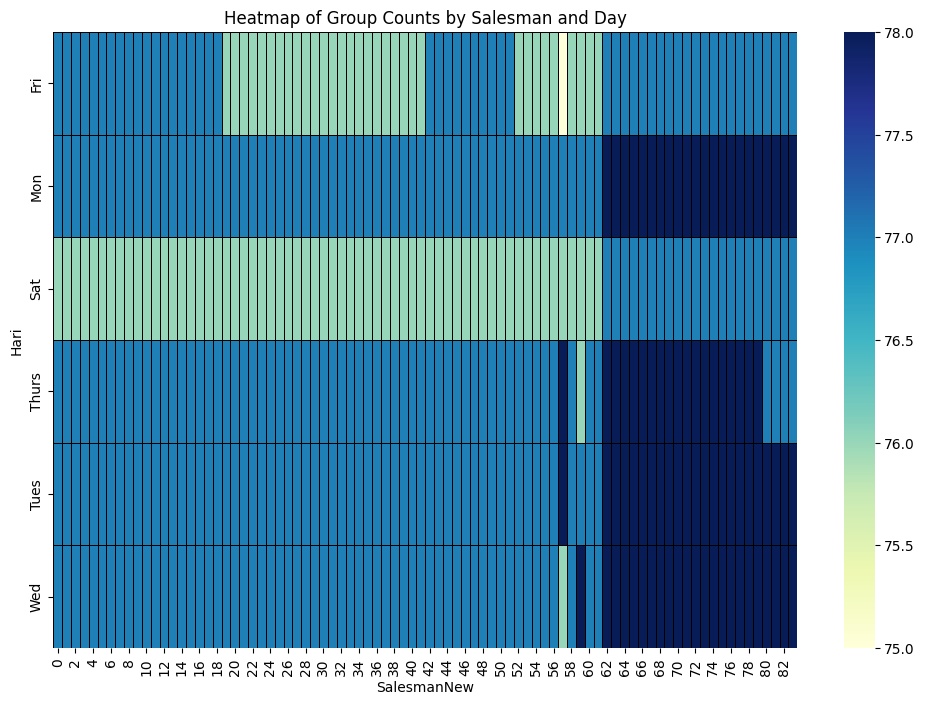

In [17]:
plt.figure(figsize=(12, 8))


heatmap = sns.heatmap(
    heatmap_data,

    cmap='YlGnBu',        
    cbar=True,           
    linewidths=0.5,        
    linecolor='black'      
)


heatmap.set_title('Heatmap of Group Counts by Salesman and Day')
heatmap.set_xlabel('Salesman')
heatmap.set_ylabel('Day')

# Show the plot
plt.show()